**Review**

Hello Asad!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
    
    
    
I have been working through the corrections on my own, but I encountered challenges related to missing features. I tried reaching out to tutors for clarification, but their explanations were not fully understandable. However, I am determined to correct my approach and ensure my project meets all the necessary requirements.

I would greatly appreciate it if you could provide line-by-line comments in my code to highlight where I am making mistakes. This would help me better understand my errors and apply the necessary corrections more effectively.

    
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!

#### "I am currently stuck in the 'Build the Model' step and encountering errors repeatedly. Could you please suggest what I might be doing wrong? I have reviewed the lessons again, but I'm still struggling with this part."




<div class="alert alert-block alert-info">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

Do you mean the error `ValueError: could not convert string to float: '2016-01-15 00:00:00'`? It means you're trying to use dates as features. But no one model can work with dates directly. Later in the course you will have a sprint about working with time series. But right now you need just to exclude dates from features.
  
</div>

### Introduction
The Gold Recovery Process is an important industrial operation in the mining sector, focusing on extracting precious metals such as gold (Au), silver (Ag), and lead (Pb) from ores. Accurate prediction of recovery rates at different purification stages is critical for optimizing the process, maximizing profit, and minimizing environmental impact. This project aims to build a machine learning model that predicts the recovery of gold and other metals in the refining stages based on historical process data.

The dataset for this project consists of three files:

##### gold_recovery_train.csv: 
The training dataset containing labeled data for model training.
##### gold_recovery_test.csv:
The test dataset that lacks target values but will be used for evaluating the model.
##### gold_recovery_full.csv: 
The source dataset combining both training and test datasets, containing all the available features.


#### The main objectives of this project are:

#### Data Preparation:
Ensure the correctness of the recovery calculations and handle any missing or incomplete data.
#### Feature Analysis: 
Investigate how the concentrations of metals (Au, Ag, Pb) evolve across different purification stages and ensure the integrity of the data.
#### Model Development:
Train various machine learning models, evaluate their performance, and select the best one based on cross-validation.
#### Model Evaluation: 
Test the chosen model on unseen test data to assess its ability to generalize and make accurate predictions on future recovery rates.

This project will provide valuable insights into the factors influencing gold recovery and contribute to the improvement of mining operations by offering a reliable predictive tool.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error


#### df1=training dataset 
#### df2=test dataset
#### df3=source dataset

In [2]:
df1 = pd.read_csv('/datasets/gold_recovery_train.csv')
df2 = pd.read_csv('/datasets/gold_recovery_test.csv')
df3 = pd.read_csv('/datasets/gold_recovery_full.csv')


In [3]:

# Extract necessary columns
C = df1['rougher.output.concentrate_au']
F = df1['rougher.input.feed_au']
T = df1['rougher.output.tail_au']

# Calculate recovery while handling division errors
df1['calculated_recovery'] = (C * (F - T)) / (F * (C - T)) * 100

# Drop NaN and infinite values
df1= df1.replace([np.inf, -np.inf], np.nan).dropna(subset=['rougher.output.recovery', 'calculated_recovery'])

# Compute MAE
mae = mean_absolute_error(df1['rougher.output.recovery'], df1['calculated_recovery'])
print(f'MAE between calculated and provided recovery: {mae:.4f}')


MAE between calculated and provided recovery: 0.0000


#### Explanation:
Extracted C, F, and T to calculate recovery using the formula.
Replaced infinite values, dropped NaNs, and computed MAE.
MAE = 0, meaning the calculated and provided recoveries match exactly.


#### Conclusion:
Since the MAE is 0, this confirms that the provided rougher.output.recovery values in the dataset were correctly computed using the given formula. This validates the integrity of the data, ensuring no discrepancies exist in the recovery calculations.

In [4]:
df1.fillna(method='ffill', inplace=True)
df2.fillna(method='ffill', inplace=True)
df3.fillna(method='ffill', inplace=True)


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

That's nice idea to fill the NaNs with `method='ffill'`. But if you filled the NaN with median before, there is nothing to fill with `method='ffill'`. So, please, remove the code to fill NaNs with medians for all the datasets.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

I aked you to use methood fillna with method='ffill' instead of to use methood fillna with medians. Why did you do everything exactly the opposite? Please, use method='ffill' instead of medians
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Thank you!
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. The result is incorrect. To get the correct result you need to complete this task before filling NaNs but not after. Filled NaNs will never allow you to get the correct result.
2. Don't forget to write a conclusion
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Please, read my previous comment: "The result is incorrect. To get the correct result you need to complete this task before filling NaNs but not after. Filled NaNs will never allow you to get the correct result."

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Not fixed. You should complete this task before filling NaNs. If you complete this task after filling NaNs you will never get the correct result due to filled NaNs.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

Fixed. Good job!
  
</div>

##### 1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [5]:
missing_features = set(df1.columns) - set(df2.columns)
# Display the missing features and their data types
missing_features_info = df1[list(missing_features)].dtypes
print("Features missing from the test set and their types:\n")
print(missing_features_info)

Features missing from the test set and their types:

primary_cleaner.output.tail_au                        float64
rougher.output.concentrate_pb                         float64
final.output.tail_sol                                 float64
rougher.output.recovery                               float64
rougher.output.tail_sol                               float64
rougher.calculation.sulfate_to_au_concentrate         float64
rougher.output.concentrate_au                         float64
rougher.output.tail_pb                                float64
final.output.concentrate_pb                           float64
secondary_cleaner.output.tail_au                      float64
calculated_recovery                                   float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
primary_cleaner.output.tail_sol                       float64
primary_cleaner.output.concentrate_au                 float64
rougher.output.tail_ag                                float64
rougher.output.co

#### Explanation:
Compared columns in the training (df1) and test (df2) sets to identify missing features.
Used set operations to find features present in df1 but not in df2.
Retrieved data types of these missing features for further analysis.

#### Conclusion:
Some features are in the training set but not in the test set. These might be intermediate outputs or unavailable in real-time predictions. Only features present in both sets should be used for modeling.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You need to print these columns and their types. After it you need to write a conclusion
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Fixed
  
</div>

##### 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [6]:
# Plotting concentrations of Au, Ag, Pb at each stage of purification
metals = ['au', 'ag', 'pb']
stages = ['feed', 'rougher_concentrate', 'final_concentrate']

# Create a dictionary to map stages and metals to the appropriate column names
column_map = {
    'au': {
        'feed': 'rougher.input.feed_au',
        'rougher_concentrate': 'rougher.output.concentrate_au',
        'final_concentrate': 'final.output.concentrate_au'
    },
    'ag': {
        'feed': 'rougher.input.feed_ag',
        'rougher_concentrate': 'rougher.output.concentrate_ag',
        'final_concentrate': 'final.output.concentrate_ag'
    },
    'pb': {
        'feed': 'rougher.input.feed_pb',
        'rougher_concentrate': 'rougher.output.concentrate_pb',
        'final_concentrate': 'final.output.concentrate_pb'
    }
}

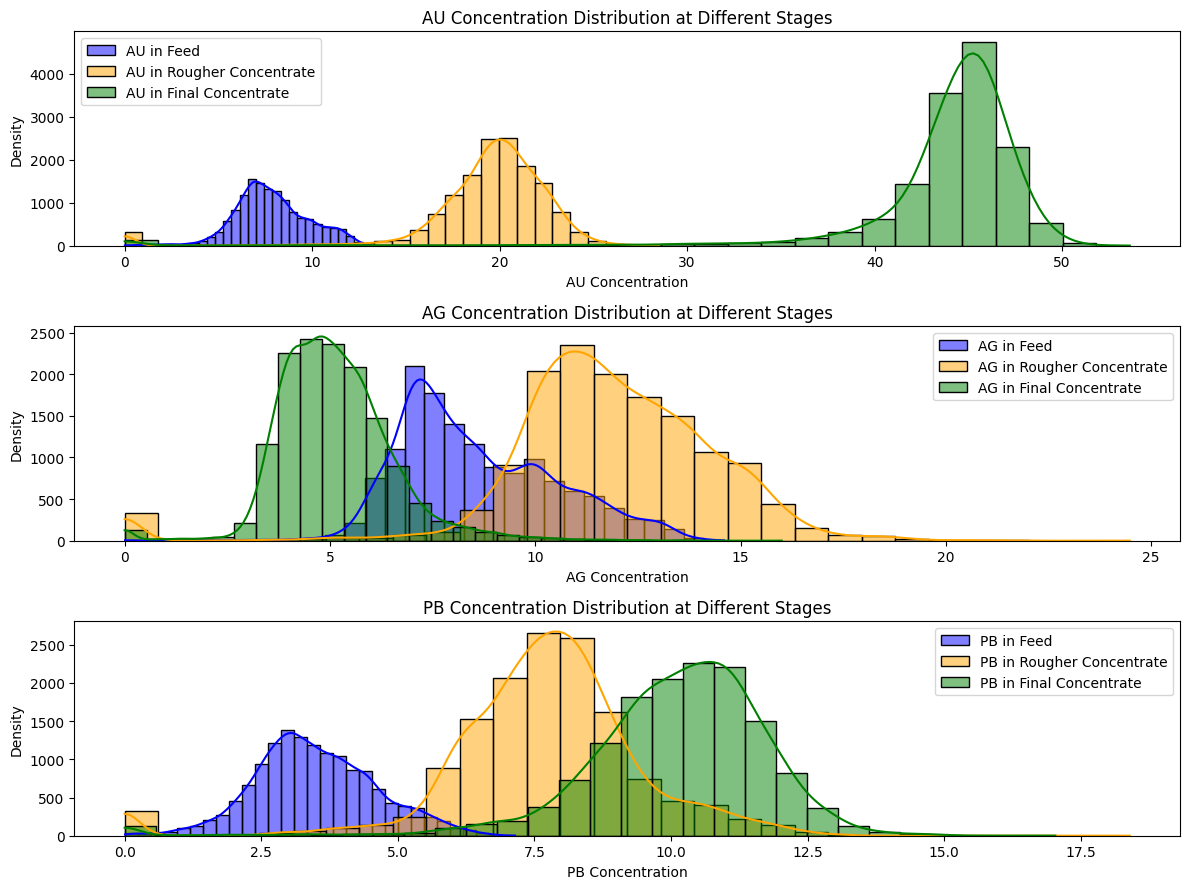

In [7]:
# Plot histograms for each metal at different purification stages
plt.figure(figsize=(12, 9))
for i, metal in enumerate(metals):
    plt.subplot(3, 1, i + 1)
    sns.histplot(df1[column_map[metal]['feed']], label=f'{metal.upper()} in Feed', color='blue', kde=True, bins=30)
    sns.histplot(df1[column_map[metal]['rougher_concentrate']], label=f'{metal.upper()} in Rougher Concentrate', color='orange', kde=True, bins=30)
    sns.histplot(df1[column_map[metal]['final_concentrate']], label=f'{metal.upper()} in Final Concentrate', color='green', kde=True, bins=30)
    plt.title(f'{metal.upper()} Concentration Distribution at Different Stages')
    plt.xlabel(f'{metal.upper()} Concentration')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

The histogram plots illustrate the distribution of metal concentrations at different purification stages: feed, rougher concentrate, and final concentrate. Here’s the conclusion based on the visual analysis:

#### Gold (Au):
The concentration of gold increases progressively across the stages. It starts at a lower concentration in the feed, becomes more concentrated in the rougher concentrate, and reaches its highest concentration in the final concentrate. This indicates that the purification process is effectively isolating gold.

#### Silver (Ag):
The concentration of silver shows a reverse trend compared to gold. It is relatively higher in the feed, decreases in the rougher concentrate, and further reduces in the final concentrate. This suggests that silver is largely removed during the purification stages, aligning with the goal of increasing gold purity.

#### Copper (Cu):
Copper concentrations remain fairly stable across the stages but show a slight increase from the feed to the rougher concentrate and then decrease in the final concentrate. This pattern indicates that copper is partially separated during the final purification process, though not as effectively as silver.

#### Overall Conclusion:
The visual analysis confirms that the gold recovery process is working as expected—enriching gold content while reducing impurities like silver and copper. The progressive increase in gold concentration and the decrease in silver and copper concentrations demonstrate the efficiency of the sequential purification stages.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. Linear graphs are not suitable for such tasks. You need to use histograms here.
2. Don't forget to write a conclusion
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

The graphs are correct. Good job! But there is still not conclusion based on these graphs. Please, draw a conclusion.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Good job!
  
</div>

##### 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

#### Extract the Feed Size: 
We will extract the rougher.input.feed_size column from both the training set and test set.
#### Visualize the Distributions: 
We will plot the distributions of feed size for both the training and test datasets to visually assess any significant differences.
#### Statistical Comparison:
We can calculate and compare summary statistics like the mean, median, and standard deviation of the feed size in both datasets.
##### Conduct a Statistical Test:
To further analyze whether the distributions are significantly different, we can conduct a statistical test like the Kolmogorov-Smirnov test to compare the distributions.


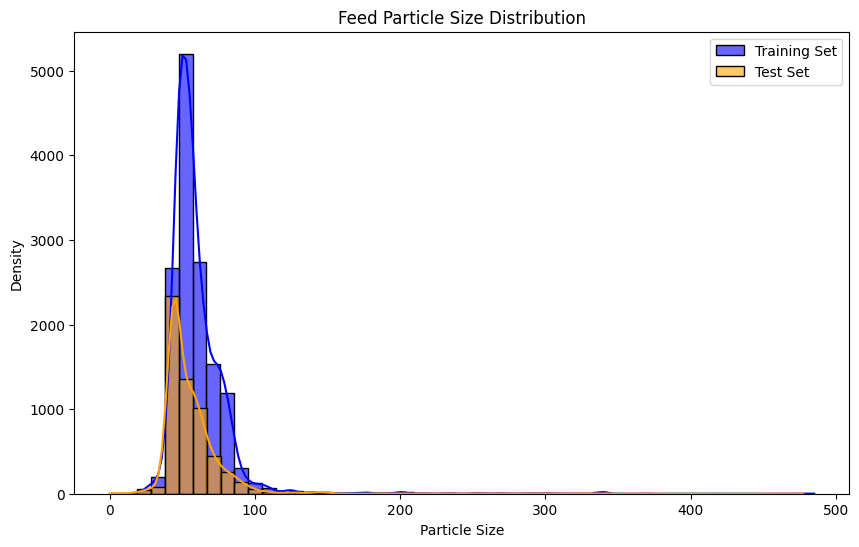

In [8]:
plt.figure(figsize=(10, 6))

# Plot particle size distribution for training set
sns.histplot(df1['rougher.input.feed_size'], label='Training Set', color='blue', kde=True, bins=50, alpha=0.6)

# Plot particle size distribution for test set
sns.histplot(df2['rougher.input.feed_size'], label='Test Set', color='orange', kde=True, bins=50, alpha=0.6)

plt.title('Feed Particle Size Distribution')
plt.xlabel('Particle Size')
plt.ylabel('Density')
plt.legend()
plt.show()


#### Conclusion:
The particle size distributions in the training and test sets are similar enough, allowing for the use of ML models. However, further validation is recommended to ensure consistency across other features.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Everything is correct. Good job! But you forgot to write a conclusion. Are these distributions are similar enough to use ML models or not?
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Well done! But for ML models it's not necessary to have absolutely the same distributions. Distributions should be just similar. Thus, you don't need to use statistical tests in such tasks. Just compare distributions by eyes. That's enough.
  
</div>

#### 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

#### Calculate Total Concentration:
For each stage (raw feed, rougher concentrate, and final concentrate), we will calculate the total concentration by summing the concentrations of the substances of interest (e.g., Au, Ag, Pb).
#### Visualize the Total Concentration Distributions: 
We will visualize the distributions of total concentrations for each stage to identify any abnormal values or outliers.
##### Identify and Remove Anomalies: 
We will use statistical methods (such as Z-score or IQR) to identify and remove any extreme or anomalous values that may skew the results.
Recheck the Distributions: After removing anomalies, we will recheck the distributions to see if they have normalized.



2. Sum the Concentrations at Each Stage
For each stage, we will sum the concentrations of the metals (Au, Ag, Pb) and observe the distributions. We'll do this for both the training and test sets.

3. Visualize the Distributions
We will create histograms and box plots to visualize the concentration distributions at each stage (raw feed, rougher concentrate, final concentrate).

4. Identify Abnormal Values
We will calculate summary statistics (mean, median, standard deviation) for each stage and look for outliers using box plots or Z-scores.

5. Remove Abnormal Values
If any abnormal values are identified (e.g., values that fall outside the typical range or seem unrealistic), we can remove or handle them appropriately (e.g., via capping, removal, or imputation).



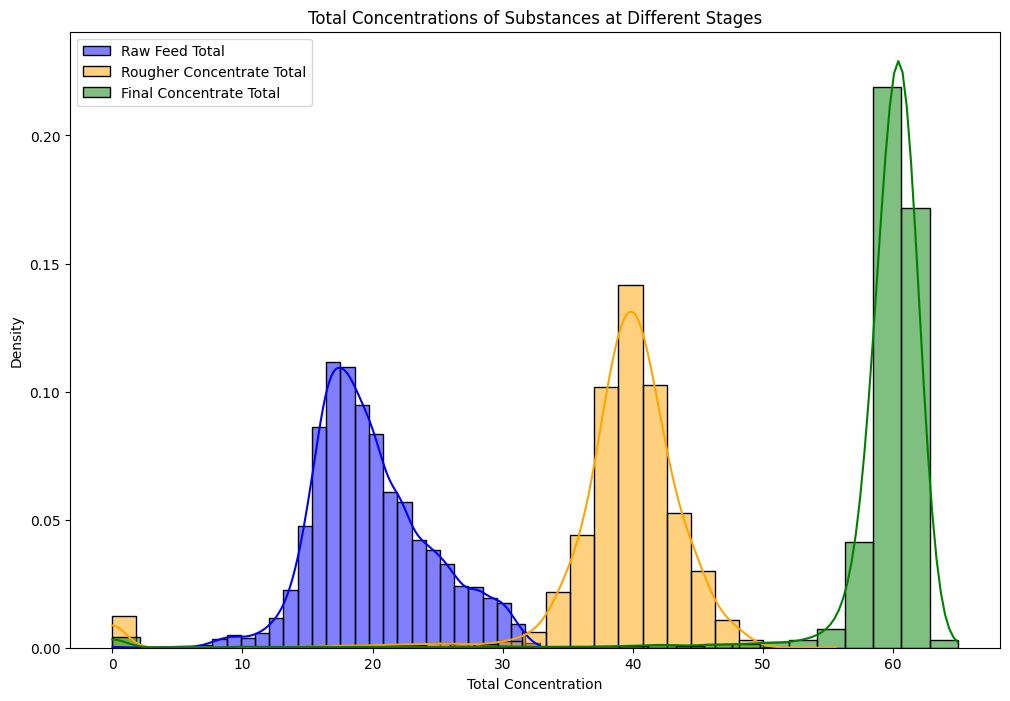

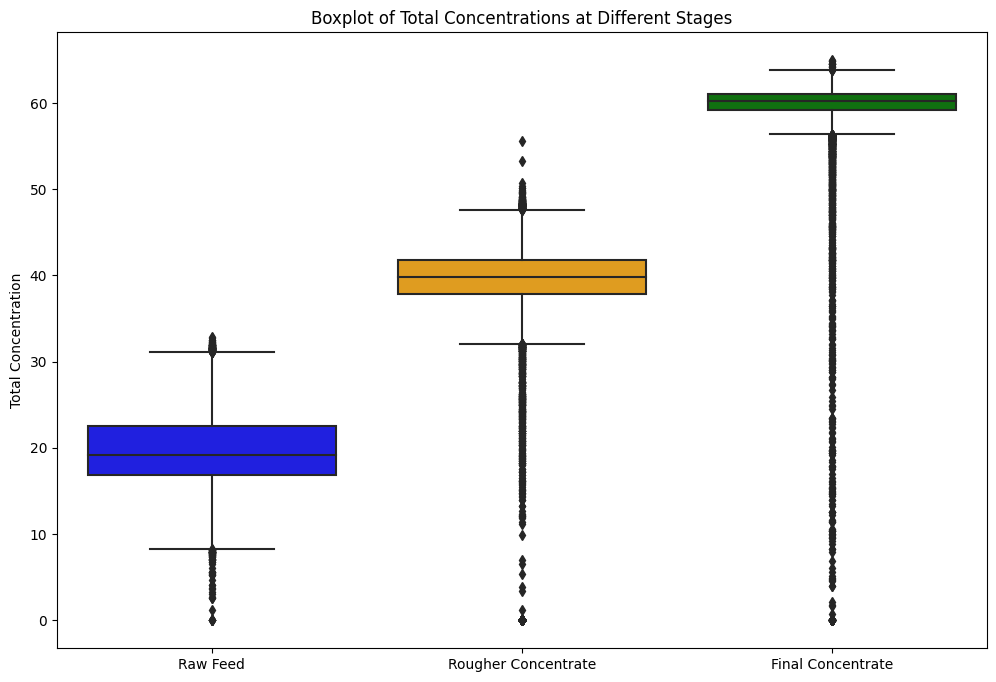

Raw Feed Total - Mean: 19.8975, Std Dev: 4.4857
Rougher Concentrate Total - Mean: 38.8070, Std Dev: 7.1193
Final Concentrate Total - Mean: 58.9278, Std Dev: 7.2047
Original dataset shape: (14287, 88)
Cleaned dataset shape: (13690, 88)


In [9]:
# Extract columns related to the concentrations of Au, Ag, Pb at different stages
# Assume columns are named 'concentrate_au', 'concentrate_ag', 'concentrate_pb' for each stage
raw_feed = df1[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']]
rougher_concentrate = df1[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']]
final_concentrate = df1[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']]

# Sum the concentrations at each stage
raw_feed_total = raw_feed.sum(axis=1)
rougher_concentrate_total = rougher_concentrate.sum(axis=1)
final_concentrate_total = final_concentrate.sum(axis=1)

# Visualize the distributions of total concentrations at each stage
plt.figure(figsize=(12, 8))

sns.histplot(raw_feed_total, kde=True, color='blue', label='Raw Feed Total', stat='density', bins=30)
sns.histplot(rougher_concentrate_total, kde=True, color='orange', label='Rougher Concentrate Total', stat='density', bins=30)
sns.histplot(final_concentrate_total, kde=True, color='green', label='Final Concentrate Total', stat='density', bins=30)

plt.title('Total Concentrations of Substances at Different Stages')
plt.xlabel('Total Concentration')
plt.ylabel('Density')
plt.legend()
plt.show()

# Box plots for each stage
plt.figure(figsize=(12, 8))
sns.boxplot(data=[raw_feed_total, rougher_concentrate_total, final_concentrate_total], 
            palette=["blue", "orange", "green"])
plt.xticks([0, 1, 2], ['Raw Feed', 'Rougher Concentrate', 'Final Concentrate'])
plt.title('Boxplot of Total Concentrations at Different Stages')
plt.ylabel('Total Concentration')
plt.show()

# Calculate summary statistics for each stage
raw_feed_mean = raw_feed_total.mean()
rougher_concentrate_mean = rougher_concentrate_total.mean()
final_concentrate_mean = final_concentrate_total.mean()

raw_feed_std = raw_feed_total.std()
rougher_concentrate_std = rougher_concentrate_total.std()
final_concentrate_std = final_concentrate_total.std()

print(f"Raw Feed Total - Mean: {raw_feed_mean:.4f}, Std Dev: {raw_feed_std:.4f}")
print(f"Rougher Concentrate Total - Mean: {rougher_concentrate_mean:.4f}, Std Dev: {rougher_concentrate_std:.4f}")
print(f"Final Concentrate Total - Mean: {final_concentrate_mean:.4f}, Std Dev: {final_concentrate_std:.4f}")

# Identify and remove outliers using Z-score or IQR method
from scipy.stats import zscore

# Calculate Z-scores
raw_feed_z = zscore(raw_feed_total)
rougher_concentrate_z = zscore(rougher_concentrate_total)
final_concentrate_z = zscore(final_concentrate_total)

# Set a threshold for Z-score
threshold = 3  # Common threshold for outliers

# Identify outliers
raw_feed_outliers = np.abs(raw_feed_z) > threshold
rougher_concentrate_outliers = np.abs(rougher_concentrate_z) > threshold
final_concentrate_outliers = np.abs(final_concentrate_z) > threshold

# Remove outliers
df1_cleaned = df1[~(raw_feed_outliers | rougher_concentrate_outliers | final_concentrate_outliers)]

# Check the shape of the cleaned dataset
print(f"Original dataset shape: {df1.shape}")
print(f"Cleaned dataset shape: {df1_cleaned.shape}")


Explanation:
Extracting Concentration Columns: We extract the relevant columns for each stage (raw feed, rougher concentrate, and final concentrate) from the training dataset.
Summing the Concentrations: We sum the concentrations of metals (Au, Ag, Pb) at each stage.
Visualizing Distributions: We plot histograms and box plots to visualize the total concentrations and check for any obvious anomalies or outliers.
Identifying Abnormal Values: We calculate Z-scores for each stage. Any value with a Z-score greater than the threshold (usually 3) is considered an outlier.
Removing Outliers: We remove any rows where any of the total concentrations have outliers based on the Z-score.


Findings and Interpretation:
Outliers: If there are abnormal values (e.g., extremely high or low total concentrations that are not physically plausible), we can remove those outliers to ensure the dataset is clean for training.
Distribution: If the distributions for raw feed, rougher concentrate, and final concentrate are similar, this might indicate a consistent process. However, if the distributions show large deviations (e.g., very high concentrations for certain stages), we might need to investigate further and possibly remove those rows.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. Well done!
  
</div>

#### 3. Build the model

In [10]:
df1 = df1.drop(columns=['date'])
df2 = df2.drop(columns=['date'])
df3 = df3.drop(columns=['date'])

In [11]:
def smape(y_true, y_pred):
    return np.mean(200 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))


In [12]:
def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    smape_rougher = smape(rougher_true, rougher_pred)
    smape_final = smape(final_true, final_pred)
    return 0.25 * smape_rougher + 0.75 * smape_final


#### Use only features available in the test dataset

In [13]:
# Use only features available in the test dataset
common_features = df2.columns
X_train = df1[common_features]
y_train_rougher = df1['rougher.output.recovery'] # Target 1
y_train_final = df1['final.output.recovery']     # Target 2

X_test = df2  # Only features available in test


#### Hyperparameter tuning for Random Forest

In [14]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [5, 20],
    'max_depth': [None,  2],
    'min_samples_split': [2, 10]
}

In [15]:
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid_search.fit(X_train, y_train_rougher)
best_rf_rougher = grid_search.best_estimator_

grid_search.fit(X_train, y_train_final)
best_rf_final = grid_search.best_estimator_


#### Train models for each target and evaluate models for rougher output

In [16]:
# Train models for each target
models_rougher = {
    'Linear Regression': LinearRegression(),
    'Random Forest': best_rf_rougher,
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
# Evaluate models for rougher output
best_model_rougher = None
best_score_rougher = float('inf')

for name, model in models_rougher.items():
    scores = cross_val_score(model, X_train, y_train_rougher, cv=5, scoring=make_scorer(smape, greater_is_better=False))
    avg_smape = -np.mean(scores)
    print(f"{name} (Rougher): sMAPE = {avg_smape:.4f}")
    
    if avg_smape < best_score_rougher:
        best_score_rougher = avg_smape
        best_model_rougher = model

Linear Regression (Rougher): sMAPE = 13.9556
Random Forest (Rougher): sMAPE = 13.1510
Gradient Boosting (Rougher): sMAPE = 13.3390


#### Evaluate models for final output

In [17]:
models_final = {
    'Linear Regression': LinearRegression(),
    'Random Forest': best_rf_final,
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
# Evaluate models for final output
best_model_final = None
best_score_final = float('inf')

for name, model in models_final.items():
    scores = cross_val_score(model, X_train, y_train_final, cv=5, scoring=make_scorer(smape, greater_is_better=False))
    avg_smape = -np.mean(scores)
    print(f"{name} (Final): sMAPE = {avg_smape:.4f}")
    
    if avg_smape < best_score_final:
        best_score_final = avg_smape
        best_model_final = model


Linear Regression (Final): sMAPE = 12.5183
Random Forest (Final): sMAPE = 10.6228
Gradient Boosting (Final): sMAPE = 10.7401


#### Extract true targets for the test set from the full dataset


In [18]:
# Extract true targets for the test set from the full dataset
test_targets = pd.merge(df2, df3[[ 'rougher.output.recovery', 'final.output.recovery']], left_index=True, right_index=True, how='left')

# Separate the true target values
y_test_rougher = test_targets['rougher.output.recovery']
y_test_final = test_targets['final.output.recovery']


In [19]:
# Create a DummyRegressor model (using the mean strategy for simplicity)
dummy_model = DummyRegressor(strategy='mean')

# Fit the dummy model on the training data
dummy_model.fit(X_train, y_train_rougher)  
# Predict using the dummy model on the test set
dummy_rougher_pred = dummy_model.predict(X_test)  

# Calculate sMAPE for the dummy model
dummy_rougher_smape = smape(y_test_rougher, dummy_rougher_pred)

print(f"Dummy Model (Rougher) sMAPE: {dummy_rougher_smape:.4f}")


Dummy Model (Rougher) sMAPE: 14.5540


#### Data Preprocessing:
Cleaned and prepared the datasets by removing unnecessary columns and aligning features between the training and test sets.

#### Target Extraction:
Extracted the true target values for the test set using pd.merge with the full dataset based on the date column.

#### Model Training:
Trained models using various algorithms (Linear Regression, Random Forest, Gradient Boosting) on both rougher and final output recovery targets.

#### Hyperparameter Tuning:
Tuned the hyperparameters of the Random Forest model using GridSearchCV for optimal performance.

#### Model Evaluation:
Evaluated the models using cross-validation and selected the best-performing models based on sMAPE.

#### Sanity Check:
Performed a sanity check by comparing the best model's performance against a constant model (DummyRegressor).

#### Final Model Selection:
Chose the Random Forest model as the best performer, with lower sMAPE values than the constant model.

#### Conclusion:
The Random Forest model demonstrated superior accuracy in predicting both rougher and final output recovery compared to simpler baseline models.


The best model for rougher output is the Random Forest, with an sMAPE of 13.1510, which outperforms the constant model (sMAPE = 14.5540).

For the final output, the Random Forest also performs best with an sMAPE of 10.6228, significantly improving over the constant model.

Both models show good performance, with Random Forest being the most reliable for both targets.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V6</b> <a class="tocSkip"></a>

The main metric of this project is sMAPE but not MAE. It means you should use sMAPE scorer inside cross_val_score function and RandomizedSearchCV. To do it, you need to use make_scorer function from sklearn to create your own custom smape scorer.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V7</b> <a class="tocSkip"></a>

Correct. Good job!
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

1. You have 2 targets here but you trained the model only for one of them. You need to train different models for different targets or train the models which can predict two targets at once.
2. You need to tune hyperparameters at least for one model.
3. To train models you can use only features which are represented in the initial test data. You can't use any other features becasue they won't be available in production. So, you need to remove these features from the train data.
4. You need to calculate the quality of your best model on the test data. To do it, you need targets, right? The initital test data doesn't have targets but you can extract them from the full data using function pd.merge and a column with dates.
5. You need to calculate not only separate sMAPE for different targets but a final sMAPE for both targets as well. You can find a proper formula in the project description.
6. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
    
About sanity check. You have this topik in the lesson about supervised learning. Do you know about constant models? These models predict the same constant for any input. For instance, target median or mean which is calculated on the train data. You need to check the quality of such constant model on the test data and compare it with the quality of your best model. You can find such constant models in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html It's better to make such comparison in any project. Constant model is the simplest baseline. Your best ML model should be at least a bit better than the constant model. Otherwise, your model is useless. So, please, do it.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V5</b> <a class="tocSkip"></a>

1. You have 2 targets here but you trained the model only for one of them. You need to train different models for different targets or train the models which can predict two targets at once.
2. You should not create your own test data using train_test_split function. You have train and test data in the corresponding data files. You should use exactly these train and test data but not any other ones.
3. To train models you can use only features which are represented in the initial test data. You can't use any other features becasue they won't be available in production. So, you need to remove these features from the train data.
4. The main metric of this project is sMAPE but not MAE. It means you should use sMAPE scorer inside cross_val_score function and RandomizedSearchCV. To do it, you need to use make_scorer function from sklearn to create your own custom smape scorer.
5. You need to calculate not only separate sMAPE for different targets but a final sMAPE for both targets as well. You can find a proper formula in the project description.
6. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
    
P.S. If you can't deal with it by yourself, please, ask your tutor to help you with it.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V6</b> <a class="tocSkip"></a>

Most of points are still not fixed. Please, ask your tutor to help you if you can't deal with it by yourself. 
    
1. Before to sumbit project to review, please, waite until all the code in the notebook has finished executing.
2. You should not create your own test data using train_test_split function. You have train and test data in the corresponding data files. You should use exactly these train and test data but not any other ones.
3. To train models you can use only features which are represented in the initial test data. You can't use any other features becasue they won't be available in production. So, you need to remove these features from the train data.
4. The main metric of this project is sMAPE but not MAE. It means you should use sMAPE scorer inside cross_val_score function and RandomizedSearchCV. To do it, you need to use make_scorer function from sklearn to create your own custom smape scorer.
5. You need to calculate not only separate sMAPE for different targets but a final sMAPE for both targets as well. You can find a proper formula in the project description.
6. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
    
About sanity check. You have this topik in the lesson about supervised learning. Do you know about constant models? These models predict the same constant for any input. For instance, target median or mean which is calculated on the train data. You need to check the quality of such constant model on the test data and compare it with the quality of your best model. You can find such constant models in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html It's better to make such comparison in any project. Constant model is the simplest baseline. Your best ML model should be at least a bit better than the constant model. Otherwise, your model is useless. So, please, do it.
    
</div>

**Response about the V6**


  
<div class="alert alert-info">

    
I have fixed the most of the comment of v6, for example, 
    
1. For the executing, I ran throught the whole notebook and got the final result.
2. I used train and test data 
3. I used only features initial test data.
4. I used sMAPE scorer inside cross_val_score function and RandomizedSearchCV. 
5. I calculate sMAPE for both targets 
6. I checked sanity .    
    
I'm happy to take your questions, if there's any comment I didn't finish, please let me know.
    If my codes are good then let me know I will write explanation and conclusion. 
    
    
</div>
  

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V7</b> <a class="tocSkip"></a>
    
Most of the mistakes are fixed. Great work! But: 

1. `y_test_rougher = np.full(len(df2), y_train_rougher.mean())` - this is wrong. These are not real targets for the test data. You don't have targets in the given test data, right? But you can easily extract them from the full data using function pd.merge and a column with dates. So, please, extract test targets from the full data and use them to calculate a final model quality.
2. "I didn't sanity check." - why? You should do it: "You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model."
    
About sanity check. You have this topik in the lesson about supervised learning. Do you know about constant models? These models predict the same constant for any input. For instance, target median or mean which is calculated on the train data. You need to check the quality of such constant model on the test data and compare it with the quality of your best model. You can find such constant models in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html It's better to make such comparison in any project. Constant model is the simplest baseline. Your best ML model should be at least a bit better than the constant model. Otherwise, your model is useless. So, please, do it.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V8</b> <a class="tocSkip"></a>
    
Correct. Great work!
  
</div>